# 觀察PTT韓劇版與日劇版的內文相似度

In [367]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import jieba.analyse
from tqdm import tqdm
import re

## 爬戲劇線上看網站的戲劇名稱
#### 來源：楓林網(http://8maple.ru)

## 韓劇列表

In [49]:
k_title=[]
for k in range(0,2):
    for j in range(2018,2020):
        for i in range(1,40):
            res = requests.get('http://8maple.ru/category/分類/韓劇/韓劇'+str(j)+'/page/'+str(i)+'/')
            soup = BeautifulSoup(res.text, "html.parser")
            for a in soup.find_all("h2",{"class":"entry-title"}):
                k_title.append(a.text)

In [50]:
korea_title=[i.split('/') for i in k_title]
korea_title = ''.join(str(korea_title)) 
korea_title=korea_title.replace("]","").replace("[","").replace("'","").replace(",","\n").replace(" ","")

In [51]:
korea = {'title': korea_title.split('\n')}
korea_list = pd.DataFrame(korea)
korea_list['category'] = '韓劇'
korea_list.head()

,title,category
0,大君-描繪愛情,韓劇
1,經常請吃飯的漂亮姐姐,韓劇
2,我的大叔,韓劇
3,江南緋聞,韓劇
4,放學後戀愛第二季,韓劇


## 日劇列表

In [140]:
j_title=[]
for k in range(0,2):
    for j in range(2018,2020):
        for i in range(1,40):
            res = requests.get('http://8maple.ru/category/分類/日劇/日劇'+str(j)+'/page/'+str(i)+'/')
            soup = BeautifulSoup(res.text, "html.parser")
            for a in soup.find_all("h2",{"class":"entry-title"}):
                j_title.append(a.text)

In [141]:
japan_title=[i.split('/') for i in j_title]
japan_title = ''.join(str(japan_title)) 
japan_title=japan_title.replace("]","").replace("[","").replace("'","").replace(",","\n").replace(" ","")

In [142]:
japan = {'title': japan_title.split('\n')}
japan_list = pd.DataFrame(japan)
japan_list['category'] = '日劇'
japan_list.head()

,title,category
0,殺人劇場,日劇
1,心,日劇
2,繼母與女兒的藍調,日劇
3,假面騎士時王,日劇
4,不會放著事件不管的偵探冬SP,日劇


## 建立字典

In [59]:
title = korea_title+'\n'+japan_title
import csv

with open('dramaname.txt', 'w') as file:

    file.write(title)

## 爬蟲
### 爬取今年下半年的PTT韓劇版與日劇版的文章標題與內容

In [121]:
jieba.set_dictionary('/Users/star/dict.txt.big')
jieba.load_userdict("dramaname.txt")

m = []
f = []
def get_title():
    for i in tqdm(range(2039, 2123)):
        #韓劇版 (2206, 2246)
        #日劇版 (2039,2123)
        res = requests.get("https://www.ptt.cc/bbs/Japandrama/index"+str(i)+".html")
        soup = BeautifulSoup(res.text)
        for website in soup.select(".r-ent"):
            try:
                
                res2 = requests.get('https://www.ptt.cc/'+website('a')[0]['href'])
                soup2 = BeautifulSoup(res2.text)
                if "資訊" in (soup2.select(".article-meta-value")[2].text):
                    pass
                elif "delete" in website.select(".title"):
                    pass
                c = soup2.select(".article-meta-value")[2].text
                d = c.split("]")
                if d[0] == c :
                    content5 = str(c).replace(' ','')
                    jeba1=('/'.join(jieba.cut(str(content5),cut_all=False)))
                    f.append(jeba1)
                else:
                    d = c.split("]")
                    #標題內容
                    content6=d[1]
                    content7=str(content6).replace(' ','')
                    jeba2=('/'.join(jieba.cut(str(content7),cut_all=False)))
                    f.append(jeba2)
                    
                split = soup2.select(".article-meta-value")[3].text
                # 文章內容
                soup3 = soup2.select(".bbs-screen.bbs-content")[0].text
                content =soup3.split(str(split))
                content2 = content[1].split("※") and content[1].split("--")
                content3 = content2[0:-1]
                content4 = str(content3).replace(' ','').replace("\\n","").replace("','","").replace("，","").replace("~","").replace("[","").replace("]","").replace("''","")
                jeba3=jieba.analyse.extract_tags(str(content4),500000)
                m.append(jeba3)        
                    
            except:
                pass
get_title()

Building prefix dict from /Users/star/dict.txt.big ...
Loading model from cache /var/folders/d9/1jgs503j2bb7pzwzprc_ymzm0000gn/T/jieba.u882bbdaf90206d8e2867544727e2acd4.cache
Loading model cost 1.686 seconds.
Prefix dict has been built succesfully.
  0%|          | 0/84 [00:00<?, ?it/s]/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
100%|██████████| 84/84 [10:06<00:00,  7.22s/it]


In [112]:
kr_dict = {'title': f,
          'content': m}
kr = pd.DataFrame(kr_dict)
kr['category'] = '韓劇'
kr.head()

,title,content,category
0,綠豆花/ep.37/-/40/因愛而生/，/叫/革命,"[利賢, 利康, 沒有, 宋慈, 義軍, 朝鮮, 牛禁峙, 白家, 義兵, 因為, 一樣, ...",韓劇
1,Voice3EP16/最終/回,"[com, imgur, jpghttps, https, www, youtube, wa...",韓劇
2,"OCN/的/""/姜/刑警/""/們","[刑警, 三位, 神父, 網友, OCN, 出現, 權酒, 雖然, 覺得, 韓國, 聯合, ...",韓劇
3,初次見面我愛你/全劇/心得/(/雷/),"[民益, 佳希, u3000, 沒有, 兩人, 媽媽, https, imgur, com,...",韓劇
4,差點/因為/劇名/錯過/的/初次見面我愛你,"[覺得, 佳希, Veronica, 時候, 部長, 有點, 因為, 喜歡, 設定, 兩集,...",韓劇


In [280]:
kr['class'] = kr['title'].apply(lambda x : ''.join(set(x.split('/')).intersection(set(korea_list['title']))))
kr.head()

,title,content,category,class
0,綠豆花/ep.37/-/40/因愛而生/，/叫/革命,"[利賢, 利康, 沒有, 宋慈, 義軍, 朝鮮, 牛禁峙, 白家, 義兵, 因為, 一樣, ...",韓劇,綠豆花
1,Voice3EP16/最終/回,"[com, imgur, jpghttps, https, www, youtube, wa...",韓劇,
2,"OCN/的/""/姜/刑警/""/們","[刑警, 三位, 神父, 網友, OCN, 出現, 權酒, 雖然, 覺得, 韓國, 聯合, ...",韓劇,
3,初次見面我愛你/全劇/心得/(/雷/),"[民益, 佳希, u3000, 沒有, 兩人, 媽媽, https, imgur, com,...",韓劇,初次見面我愛你
4,差點/因為/劇名/錯過/的/初次見面我愛你,"[覺得, 佳希, Veronica, 時候, 部長, 有點, 因為, 喜歡, 設定, 兩集,...",韓劇,初次見面我愛你


In [138]:
jp_dict = {'title': f,
          'content': m}
jp = pd.DataFrame(jp_dict)
jp['category'] = '日劇'
jp.head()

,title,content,category
0,Re/:/［/地雷/］/輪到你了/第二季/EP1,"[木下, 橫濱, 各個, 黑島, 流星, 心怡, 喜歡, 住戶, 沒有, ..., 幾個, ...",日劇
1,輪到你了/第二季/EP1,"[木下, 住戶, 應該, 黑島, 雖然, 真兇, 感覺, 總一, 橫濱, 各個, 流星, 心...",日劇
2,隱匿/於/冬///北澤/一家/SP,"[XD, 秀作, 可愛, SP, 有點, 本篇, 還是, 戲份, 覺得, AI, 雖然, 楠...",日劇
3,2019/夏季/檔/收視/報告,"[http, bit, ly, 07, 22, 8.7, 20, 11START, 21, ...",日劇
4,19/'/春夏/晨間/劇/《/夏空/》/收視/報告/(/雷/),"[小夏, 04, 05, 06, 08, 夢想, 木金土, 19, NHK, 晨間, 夏空,...",日劇


In [281]:
jp['class'] = jp['title'].apply(lambda x : ''.join(set(x.split('/')).intersection(set(japan_list['title']))))
jp.head()

,title,content,category,class
0,Re/:/［/地雷/］/輪到你了/第二季/EP1,"[木下, 橫濱, 各個, 黑島, 流星, 心怡, 喜歡, 住戶, 沒有, ..., 幾個, ...",日劇,輪到你了
1,輪到你了/第二季/EP1,"[木下, 住戶, 應該, 黑島, 雖然, 真兇, 感覺, 總一, 橫濱, 各個, 流星, 心...",日劇,輪到你了
2,隱匿/於/冬///北澤/一家/SP,"[XD, 秀作, 可愛, SP, 有點, 本篇, 還是, 戲份, 覺得, AI, 雖然, 楠...",日劇,
3,2019/夏季/檔/收視/報告,"[http, bit, ly, 07, 22, 8.7, 20, 11START, 21, ...",日劇,
4,19/'/春夏/晨間/劇/《/夏空/》/收視/報告/(/雷/),"[小夏, 04, 05, 06, 08, 夢想, 木金土, 19, NHK, 晨間, 夏空,...",日劇,夏空


In [470]:
drama = kr.append(jp)
drama.reset_index(inplace=True, drop=True)
drama.drop(drama[drama['class']==''].index, axis=0, inplace=True)
drama.reset_index(inplace=True, drop=True)
drama.head()

,title,content,category,class
0,綠豆花/ep.37/-/40/因愛而生/，/叫/革命,"[利賢, 利康, 沒有, 宋慈, 義軍, 朝鮮, 牛禁峙, 白家, 義兵, 因為, 一樣, ...",韓劇,綠豆花
1,初次見面我愛你/全劇/心得/(/雷/),"[民益, 佳希, u3000, 沒有, 兩人, 媽媽, https, imgur, com,...",韓劇,初次見面我愛你
2,差點/因為/劇名/錯過/的/初次見面我愛你,"[覺得, 佳希, Veronica, 時候, 部長, 有點, 因為, 喜歡, 設定, 兩集,...",韓劇,初次見面我愛你
3,輔佐官/EP5/-/6/(/雷/),"[u3000, ..., 輔佐官, 泰俊, 議員, 吳元植, 處理, 還是, 孫子, 失望,...",韓劇,輔佐官
4,檢法男女/2EP.17/、/EP.18,"[com, imgur, https, jpghttps, 官網, 檢法男女, http, ...",韓劇,檢法男女


In [471]:
stopWords = ['imgur', 'jpg', 'com', 'https', 'www', 'jpghttps', 'youtube', 'watch', 'png', 'http', 'u3000']
drama['content'] = drama['content'].apply(lambda x: list(filter(lambda a: a not in stopWords, x)))

In [472]:
drama.head()

,title,content,category,class
0,綠豆花/ep.37/-/40/因愛而生/，/叫/革命,"[利賢, 利康, 沒有, 宋慈, 義軍, 朝鮮, 牛禁峙, 白家, 義兵, 因為, 一樣, ...",韓劇,綠豆花
1,初次見面我愛你/全劇/心得/(/雷/),"[民益, 佳希, 沒有, 兩人, 媽媽, 可愛, 最後, 奇蹟, 結局, 還是, 喜歡, X...",韓劇,初次見面我愛你
2,差點/因為/劇名/錯過/的/初次見面我愛你,"[覺得, 佳希, Veronica, 時候, 部長, 有點, 因為, 喜歡, 設定, 兩集,...",韓劇,初次見面我愛你
3,輔佐官/EP5/-/6/(/雷/),"[..., 輔佐官, 泰俊, 議員, 吳元植, 處理, 還是, 孫子, 失望, 二集, 未來...",韓劇,輔佐官
4,檢法男女/2EP.17/、/EP.18,"[官網, 檢法男女, MBC, 時間, 白範, 飾演, 屍體, 開始, 東部, 地檢, jp...",韓劇,檢法男女


In [484]:
drama_sum = pd.DataFrame(drama.groupby(['class','category'])['content'].sum())
drama_sum.reset_index(inplace=True)
drama_sum.head()

,class,category,content
0,G弦上的你和我,日劇,"[這集, 若宮, XD, 節奏, 緊張感, 沒想到, 菅野美穗, 這麼, 很強, 對峙, 時..."
1,Justice,韓劇,"[韓國, 其實, 起來, ..., 脫罪, 崔振赫, 飾演, 看到, 人渣, 本來, 預定,..."
2,Life,韓劇,"[寶娜, 詩溫, 李律, 世界, 因為, 一個, 這個, 以後, 張道植, 可愛, 平行, ..."
3,Live,韓劇,"[因為, 戀愛, XD, 靜伍, Live, 沒有, 惠利, 不過, 尚秀, 覺得, 什麼,..."
4,Mr.臨時老師臨時制先生,韓劇,"[tw, iqiyi, 千明, 學生, ocn, OCN, 時間, 愛奇藝, 飾演, 奇江載..."


In [498]:
corpus = drama_sum['content'].tolist()

In [499]:
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)  
X = vectorizer.fit_transform(corpus)  
word = vectorizer.get_feature_names()  

from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

In [541]:
len(corpus)
features = tfidf.toarray()
labels = drama_sum['class'].values
labels

array(['G弦上的你和我', 'Justice', 'Life', 'Live', 'Mr.臨時老師臨時制先生',
       'Sign法醫學者柚木貴志的案件', 'TwoWeeks', 'VIP', '一起生活吧', '不倫食堂', '中學聖日記',
       '他人即地獄', '你已藏在我心底', '假面同窗會', '偉大的Show', '偵探醫生', '偶然發現的一天', '偽裝不倫',
       '僅此一次的愛情', '優雅的家', '全裸導演', '全裸監督', '八墓村', '凪的新生活', '初次見面我愛你',
       '前男友狂', '十八歲', '各自的斷崖', '同期的小櫻', '喜歡', '喜歡優雅的家', '喜歡的話請響鈴', '夏洛克',
       '夏洛克潤一', '夏空', '大叔之愛', '大家的謊言', '天國餐館', '天才保姆阿銀', '太陽的季節',
       '奔跑的調查官', '孤獨的美食家第八季', '學園爆笑王', '完美世界', '山茶花開時', '平日下午三點的戀人',
       '德魯納酒店', '心', '想被擁抱的12個女人', '我可能不會愛你日版', '我的事說來話長', '我的大叔', '我的王國',
       '我要準時下班', '所以我就推你了', '所以我推她', '所有人的謊言大家的謊言', '抓住幽靈', '數位刺青',
       '新入史官丘海昤', '新手姐妹的雙人餐桌', '春夜', '昨日的美食', '時效警察開始了', '朝鮮生存記', '檢法男女',
       '死役所', '水果宅急便', '浪漫的體質', '浪行驚爆點', '深夜的吧台公主', '潤一', '濕身偵探水野羽衣',
       '熱血司祭', '爆炸頭田中', '生日信', '當惡魔呼喊你的名字時', '百合與直覺', '監察醫朝顏', '監獄醫生',
       '神之手', '秘密精品店', '絕叫', '絕對男友', '綠豆花', '緋紅', '繼母與女兒的藍調', '老公進不來',
       '臨時制先生', '自白', '致親愛的法官大人', '蟬男', '詐欺刑警', '詐騙', '請勿轉台', '輔佐官',
       '輪到你了', '輪到

In [501]:
# PCA
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
transData = pca.fit_transform(features, labels)
type(transData)
drama_sum['pca1'] = pd.DataFrame(transData[:,0])
drama_sum['pca2'] = pd.DataFrame(transData[:,1])
drama_sum.head()

,class,category,content,pca1,pca2
0,G弦上的你和我,日劇,"[這集, 若宮, XD, 節奏, 緊張感, 沒想到, 菅野美穗, 這麼, 很強, 對峙, 時...",-0.186536,0.015201
1,Justice,韓劇,"[韓國, 其實, 起來, ..., 脫罪, 崔振赫, 飾演, 看到, 人渣, 本來, 預定,...",-0.034001,-0.006958
2,Life,韓劇,"[寶娜, 詩溫, 李律, 世界, 因為, 一個, 這個, 以後, 張道植, 可愛, 平行, ...",0.072598,0.009413
3,Live,韓劇,"[因為, 戀愛, XD, 靜伍, Live, 沒有, 惠利, 不過, 尚秀, 覺得, 什麼,...",-0.011406,-0.049992
4,Mr.臨時老師臨時制先生,韓劇,"[tw, iqiyi, 千明, 學生, ocn, OCN, 時間, 愛奇藝, 飾演, 奇江載...",0.453119,0.627908


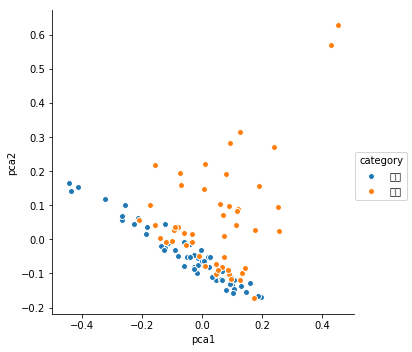

In [502]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(x_vars=['pca1'], y_vars=['pca2'], data=drama_sum, hue="category", size=5)

In [503]:
textFrame = pd.DataFrame(features, columns = word)

In [504]:
m = 0.1
dataset = list()
for i in range(len(features)):
    temp = textFrame.columns.values[[textFrame.iloc[i] >= m]]
    dataset.append(temp.tolist())

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.


In [505]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
graph = df.T
graph.columns = drama_sum['class']

In [507]:
graph.tail()

class,G弦上的你和我,Justice,Life,Live,Mr.臨時老師臨時制先生,Sign法醫學者柚木貴志的案件,TwoWeeks,VIP,一起生活吧,不倫食堂,...,醫生耀漢,野乃湯,金秘書為何那樣,阿斯達年代記,陽光先生,香水,高嶺之花,魯邦的女兒,黑色校規,黑色醜聞
黑暗,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
黑道,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
點開,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
龍星,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
龍植,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Apriori

In [515]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [532]:
result = apriori(graph, min_support=0.0005, use_colnames=True)
rules_by_lift = association_rules(result, metric="lift", min_threshold=1.1)
print(rules_by_lift)

          antecedents        consequents  antecedent support  \
0            (天才保姆阿銀)          (Justice)            0.024457   
1           (Justice)           (天才保姆阿銀)            0.002717   
2             (監察醫朝顏)  (Sign法醫學者柚木貴志的案件)            0.004076   
3   (Sign法醫學者柚木貴志的案件)            (監察醫朝顏)            0.025815   
4             (各自的斷崖)         (TwoWeeks)            0.021060   
5          (TwoWeeks)            (各自的斷崖)            0.017663   
6          (TwoWeeks)             (請勿轉台)            0.017663   
7              (請勿轉台)         (TwoWeeks)            0.034647   
8          (致親愛的法官大人)              (VIP)            0.024457   
9               (VIP)         (致親愛的法官大人)            0.009511   
10         (繼母與女兒的藍調)             (不倫食堂)            0.032609   
11             (不倫食堂)         (繼母與女兒的藍調)            0.029891   
12            (他人即地獄)            (大家的謊言)            0.004076   
13            (大家的謊言)            (他人即地獄)            0.024457   
14                (心)            (假面同窗會)

In [533]:
rules_by_lift["antecedent_len"] = rules_by_lift["antecedents"].apply(lambda x: len(x))
rules_by_lift[ (rules_by_lift['antecedent_len'] >= 1) &
               (rules_by_lift['confidence'] >= 0.01) &
               (rules_by_lift['lift'] >= 1.1) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(天才保姆阿銀),(Justice),0.024457,0.002717,0.000679,0.027778,10.222222,0.000613,1.025776,1
1,(Justice),(天才保姆阿銀),0.002717,0.024457,0.000679,0.250000,10.222222,0.000613,1.300725,1
2,(監察醫朝顏),(Sign法醫學者柚木貴志的案件),0.004076,0.025815,0.001359,0.333333,12.912281,0.001253,1.461277,1
3,(Sign法醫學者柚木貴志的案件),(監察醫朝顏),0.025815,0.004076,0.001359,0.052632,12.912281,0.001253,1.051253,1
4,(各自的斷崖),(TwoWeeks),0.021060,0.017663,0.000679,0.032258,1.826303,0.000307,1.015082,1
5,(TwoWeeks),(各自的斷崖),0.017663,0.021060,0.000679,0.038462,1.826303,0.000307,1.018098,1
6,(TwoWeeks),(請勿轉台),0.017663,0.034647,0.000679,0.038462,1.110106,0.000067,1.003967,1
7,(請勿轉台),(TwoWeeks),0.034647,0.017663,0.000679,0.019608,1.110106,0.000067,1.001984,1
8,(致親愛的法官大人),(VIP),0.024457,0.009511,0.000679,0.027778,2.920635,0.000447,1.018789,1
9,(VIP),(致親愛的法官大人),0.009511,0.024457,0.000679,0.071429,2.920635,0.000447,1.050585,1


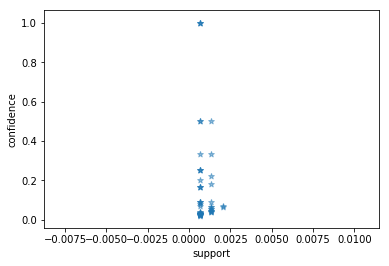

In [534]:
support = rules_by_lift['support']
confidence = rules_by_lift['confidence']
plt.scatter(support, confidence, alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

## Graph

In [537]:
import networkx as nx
G = nx.DiGraph()
for i in range(len(drama_sum)):
    G.add_node(i)
for i in range(len(rules_by_lift['antecedents'])):
    currentFrom = list(rules_by_lift['antecedents'][i])
    currentTo = list(rules_by_lift['consequents'][i])
    for j in range(len(currentFrom)):
        G.add_edge(currentFrom[j], currentTo[0])

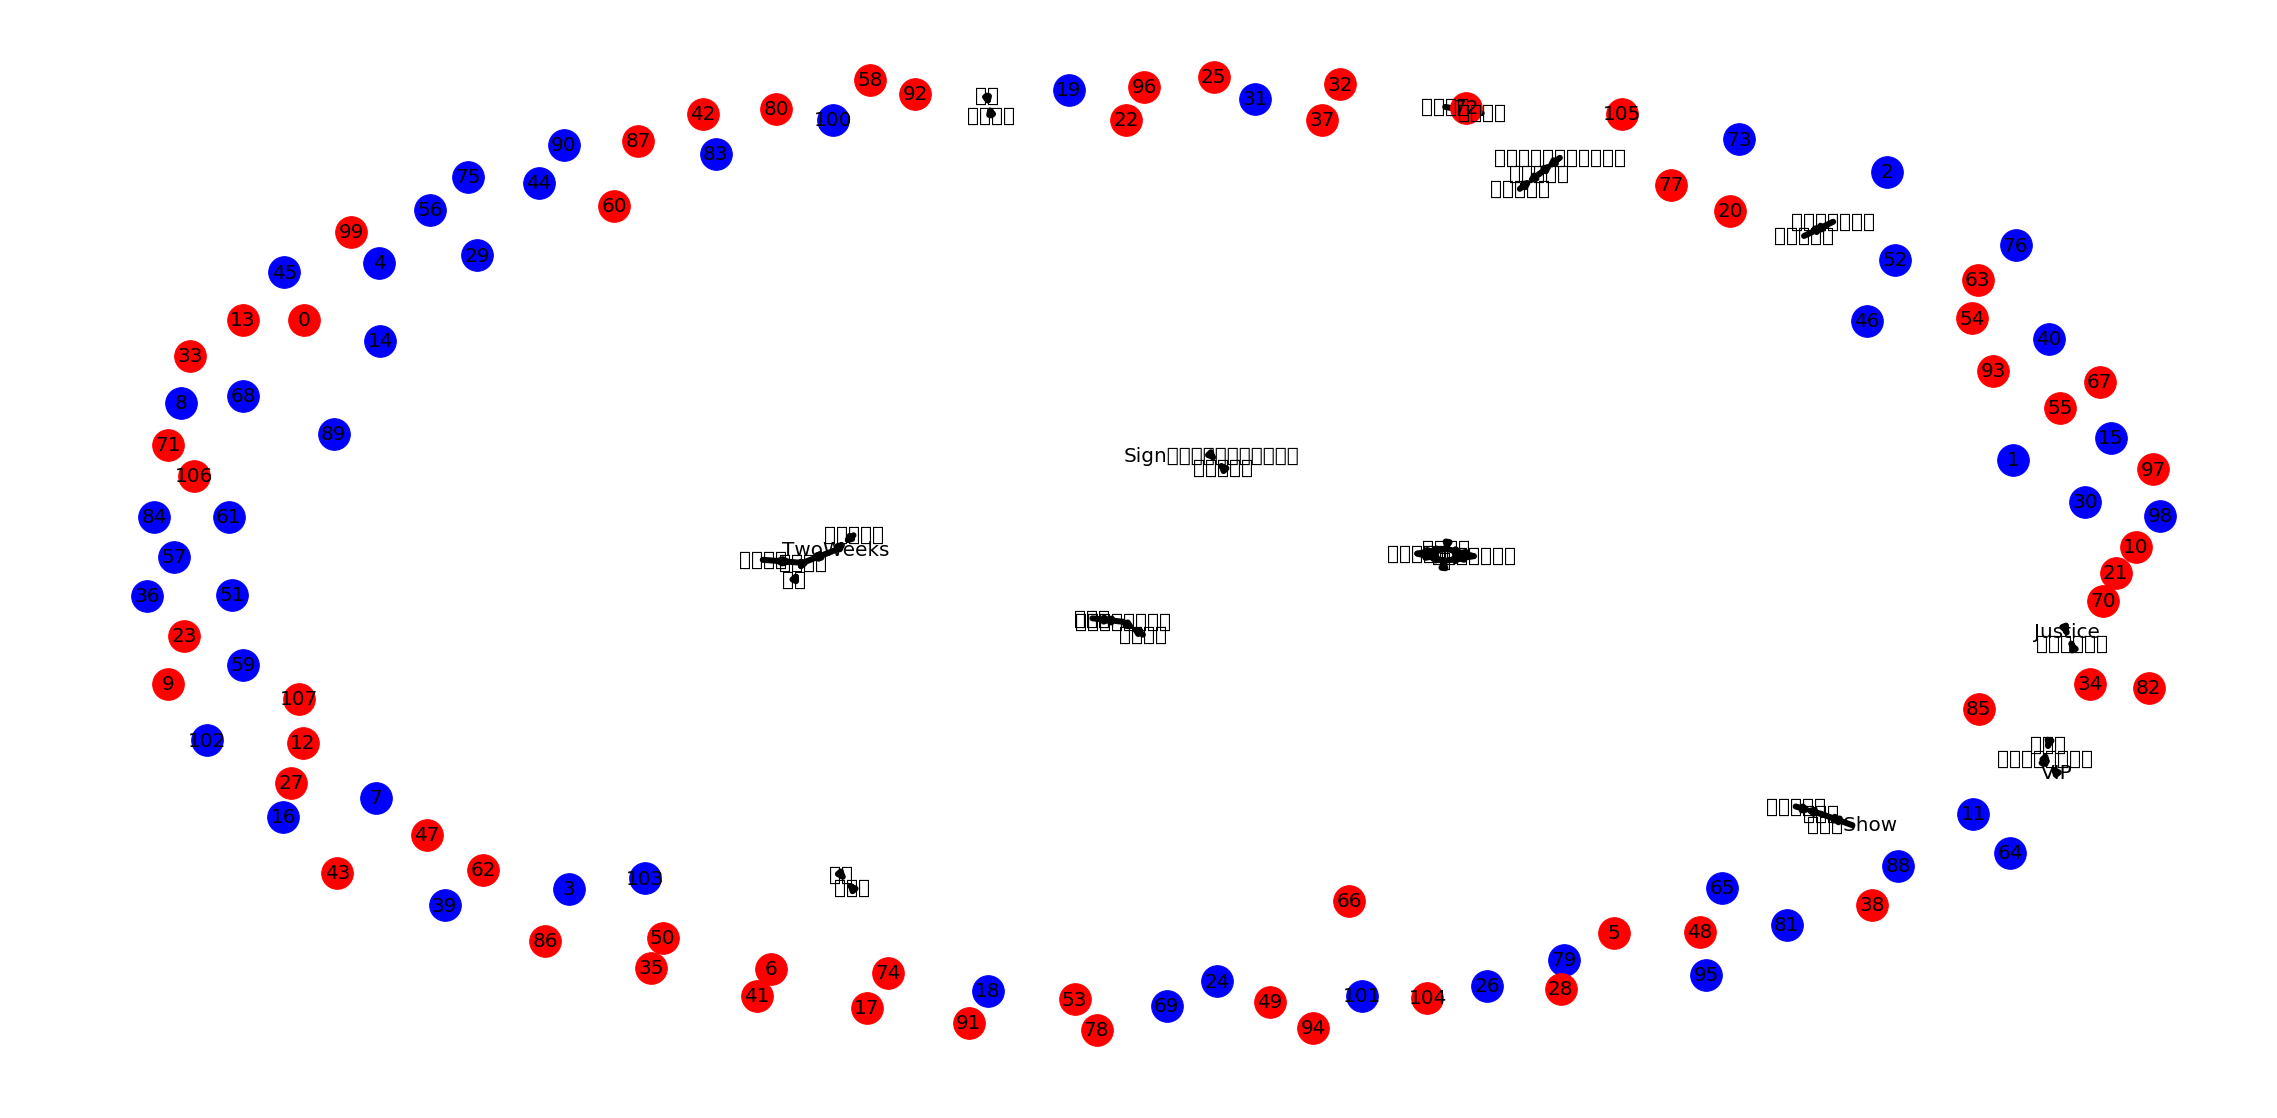

In [538]:
nodeListA = drama_sum.index[drama_sum['category'] == '韓劇'].tolist()
nodeListB = drama_sum.index[drama_sum['category'] == '日劇'].tolist()

plt.figure(figsize=(40,20))

# positions for all nodes
pos = nx.fruchterman_reingold_layout(G)

# nodes
nx.draw_networkx_nodes(G, pos, nodelist=nodeListA, node_color="b", node_size=1000)
nx.draw_networkx_nodes(G, pos, nodelist=nodeListB, node_color="r", node_size=1000)
nx.draw_networkx_edges(G, pos, width=6)

# labels
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

plt.axis('off')
# plt.savefig("weighted_graph.png") # save as png
plt.show() # display

In [539]:
# 獨立
len(list(nx.isolates(G)))

108

In [542]:
# 小群體
from networkx.algorithms.approximation import dominating_set
dominating_set.min_edge_dominating_set(G)

{('他人即地獄', '大家的謊言'),
 ('偉大的Show', '輔佐官'),
 ('全裸監督', '全裸導演'),
 ('各自的斷崖', 'TwoWeeks'),
 ('天才保姆阿銀', 'Justice'),
 ('心', '假面同窗會'),
 ('所以我推她', '所以我就推你了'),
 ('監察醫朝顏', 'Sign法醫學者柚木貴志的案件'),
 ('繼母與女兒的藍調', '不倫食堂'),
 ('致親愛的法官大人', 'VIP'),
 ('詐欺刑警', '詐騙'),
 ('請勿轉台', '完美世界'),
 ('輪到你了', '輪到你了番外篇'),
 ('野乃湯', '潤一')}